<a href="https://colab.research.google.com/github/cu-applied-math/SciML-Class/blob/main/Labs/lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
from scipy.ndimage import gaussian_filter, gaussian_filter1d
from PIL import Image

Download an image

In [3]:
!wget -q -O logo.jpeg 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSixRrWNbEVXhVaaYYUQhbWpCa3KbxI65ZoXw&s'

Image is 165 x 225 pixels


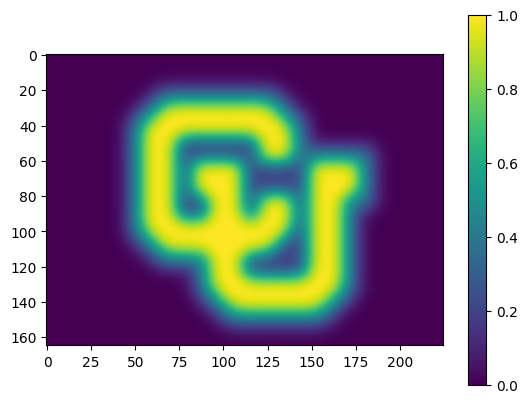

In [4]:
im = Image.open("logo.jpeg")
# print(im.format, im.size, im.mode)
n1,n2 = im.size
# im.show() # or just im  by itself
image = np.array(
    im.convert('L').getdata(), # turns it to grayscale
    dtype=np.float32  # convert to floating point, and use Single not Double since that's default for PyTorch
    ).reshape(im.size[0], im.size[1])

# For the CU logo, let's take just the central part:
image = image[:-60,:]

# and to make it even easier, let's make the image smooth
image = gaussian_filter(image,sigma=5)

image /= image.max() # put it in [0,1] range, so neural net initialization works
n1,n2 = image.shape
print(f'Image is {n1} x {n2} pixels')
plt.imshow( image )
plt.colorbar()
plt.show()

In [5]:
def trueLabels(X):
  """ Assumes 2D input, typically in [0,1] x [0,1]
  X has size [batch,2]
  Internally, converts the 2D coordinates to 1D indices
    then changes from a continuous value to a discrete value and returns the value of that pixel
  """
  X = np.ravel_multi_index( (np.int64(X[:,0]*n1), np.int64(X[:,1]*n2)), mode='clip', dims=(n1,n2) )
  y = np.ravel(image)[X]
  return torch.from_numpy(y ).unsqueeze(1) # unqueeze makes it size (batch_size,1) rather than (batch_size,)

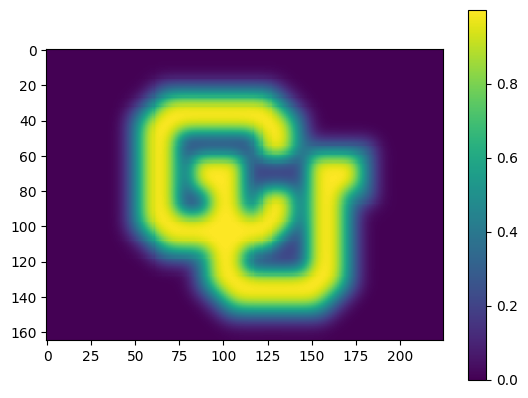

In [6]:
X = torch.cartesian_prod(torch.arange(0,n1)/n1,torch.arange(0,n2)/n2)
y = trueLabels(X)
plt.imshow(y.detach().numpy().reshape( (n1,n2) ) )
plt.colorbar()
plt.show()

In [10]:
loss_fn  = ????

class MyNet(nn.Module):
    def __init__(self):
        super().__init__()
        ???

    def forward(self, x):
        ???

In [ ]:
model = MyNet()

optimizer     = torch.optim. ????
...

In [ ]:
X    = torch.cartesian_prod(torch.arange(0,n1)/n1,torch.arange(0,n2)/n2)
y    = trueLabels(X)

model.eval()
with torch.no_grad():
    yHat = model(X)

fig, ax = plt.subplots(1,2)
ax[0].imshow(yHat.detach().numpy().reshape( (n1,n2) ) )
ax[0].set_title('Output of neural net')
ax[1].imshow(y.detach().numpy().reshape( (n1,n2) ) )
ax[1].set_title('True image')
plt.show()